# **Telco Customer Churn Prediction**

**Tujuan:**
Memprediksi apakah pelanggan akan berhenti berlangganan (Churn) berdasarkan pola perilaku pelanggan untuk membantu perusahaan mempertahankan pelanggan lebih baik.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/TelcoCustChurn.csv'
data = pd.read_csv(file_path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data_cleaned = data.drop(['customerID'],axis=1)
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(data.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


/tmp/ipython-input-219-1033660520.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [ ]:
fitur = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'tenure', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges']

In [ ]:
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
data['gender'] = data['gender'].map({'Female': 1, 'Male': 0})
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
to_encode = [
    'InternetService', 'Contract', 'PaymentMethod',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
data_encoded = pd.get_dummies(data, columns=to_encode, drop_first=True)
print(data_encoded.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   
3  7795-CFOCW       0              0        0           0      45   
4  9237-HQITU       1              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                             False              True   
1                             False   

In [ ]:
X = data_encoded.drop(['customerID', 'Churn'], axis=1)
y = data_encoded['Churn']
print(X.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  \
0                 1           29.85         29.85   
1                 0           56.95       1889.50   
2                 1           53.85        108.15   
3                 0           42.30       1840.75   
4                 1           70.70        151.65   

   InternetService_Fiber optic  ...  OnlineBackup_No internet service  \
0                        False  ...                             False   
1                        False  ...                             False   
2                        False  ...

In [ ]:
# X = data[fitur]
# print(X.head())

In [ ]:
# label = data['Churn']
# print(label)

In [ ]:
y = data['Churn']
print(y.value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data trainig X:", X_train.shape)
print("Ukuran data training y:", y_train.shape)
print("Ukuran data testing X:", X_test.shape)
print("Ukuran data testing y:", y_test.shape)

print("Beberapa baris data testing X:\n", X_test.head())

Ukuran data trainig X: (5634, 30)
Ukuran data training y: (5634,)
Ukuran data testing X: (1409, 30)
Ukuran data testing y: (1409,)
Beberapa baris data testing X:
       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
185        1              0        1           0       1             0   
2715       0              0        0           0      41             1   
3825       1              0        1           1      52             1   
1807       1              0        0           0       1             1   
132        0              0        0           0      67             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  \
185                  1           24.80         24.80   
2715                 1           25.25        996.45   
3825                 0           19.35       1031.70   
1807                 0           76.35         76.35   
132                  0           50.55       3260.10   

      InternetService_Fiber optic  ...  OnlineBackup_No

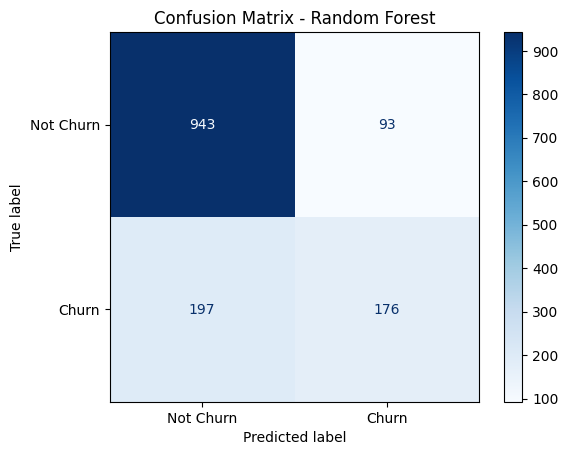

Akurasi model Random Forest: 0.794180269694819
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def show_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
show_confusion_matrix("Random Forest", y_test, y_pred)

print("Akurasi model Random Forest:", accuracy_score(y_test, y_pred))

classification_report = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_report)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


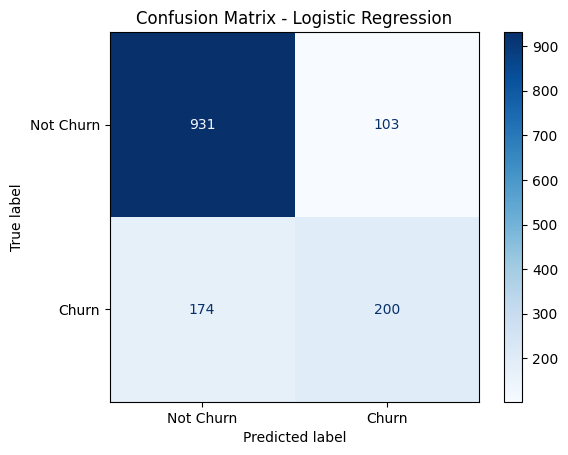

Akurasi Logistic Regression: 0.8032670454545454
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1034
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1408
   macro avg       0.75      0.72      0.73      1408
weighted avg       0.79      0.80      0.80      1408



In [ ]:
#Stratified 5-fold Cross Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

data_model = LogisticRegression(max_iter=1000)

def show_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

data_model.fit(X_train, y_train)

y_pred_data = data_model.predict(X_test)
show_confusion_matrix("Logistic Regression", y_test, y_pred_data)

print("Akurasi Logistic Regression:", accuracy_score(y_test, y_pred_data))
print(classification_report(y_test, y_pred_data))


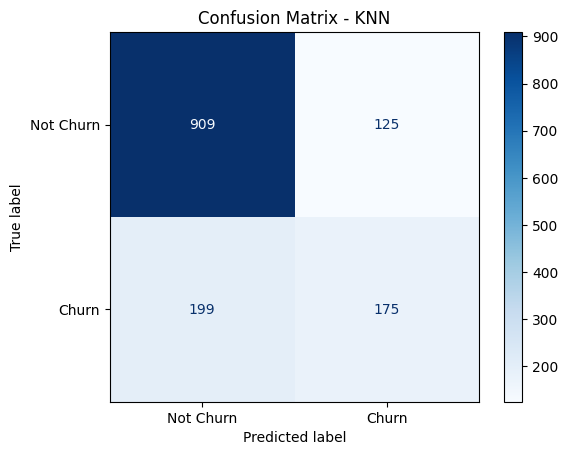

Akurasi KNN: 0.7698863636363636
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1034
           1       0.58      0.47      0.52       374

    accuracy                           0.77      1408
   macro avg       0.70      0.67      0.68      1408
weighted avg       0.76      0.77      0.76      1408



In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

def show_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
show_confusion_matrix("KNN", y_test, y_pred_knn)

print("Akurasi KNN:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

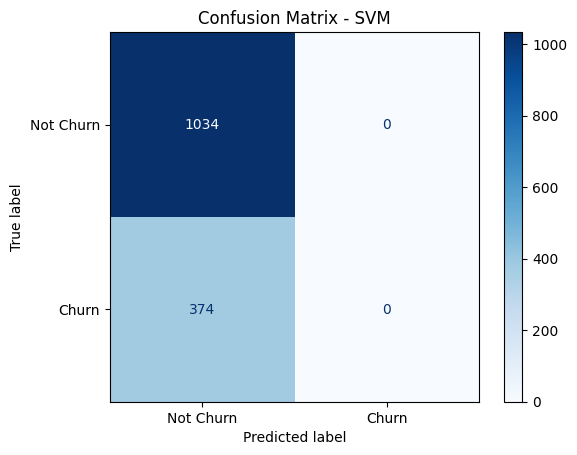

Akurasi SVM: 0.734375
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1034
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1408
   macro avg       0.37      0.50      0.42      1408
weighted avg       0.54      0.73      0.62      1408



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def show_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
show_confusion_matrix("SVM", y_test, y_pred_svm)

print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

In [ ]:
import pandas as pd

compare = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'KNN', 'SVM'],
    'Accuracy': [0.7933, 0.8033, 0.7699, 0.7344],
    'F1-score (Churn)': [0.56, 0.59, 0.52, 0.00]
})

compare

,Model,Accuracy,F1-score (Churn)
0,Random Forest,0.7933,0.56
1,Logistic Regression,0.8033,0.59
2,KNN,0.7699,0.52
3,SVM,0.7344,0.00


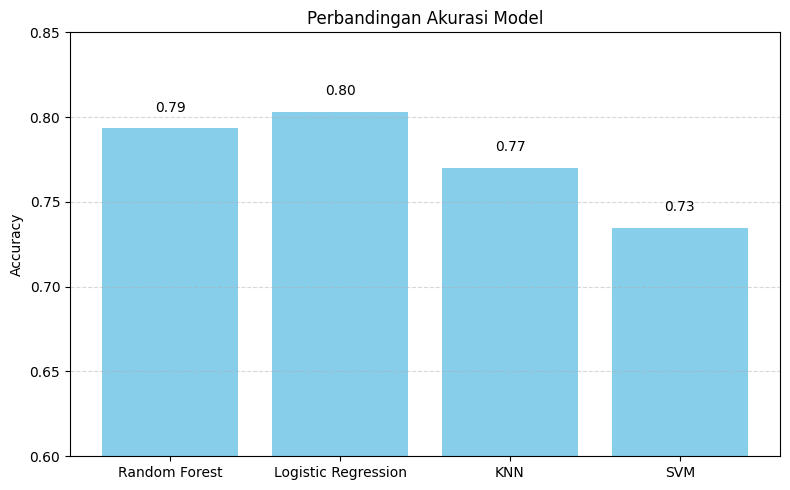

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Logistic Regression', 'KNN', 'SVM']
accuracies = [0.7933, 0.8033, 0.7699, 0.7344]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color='skyblue')
plt.ylim(0.6, 0.85)
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model")

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{acc:.2f}", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **Kesimpulan:**

- Model terbaik berdasarkan akurasi dan f1-score churn adalah Logistic Regression (akurasi 80%, F1-score churn: 0.59).

- Random Forest juga cukup baik (akurasi 79%, F1-score churn: 0.56), dengan keunggulan dalam mendeteksi non-churn.

- SVM gagal mengenali churn. Model ini terlalu berat sebelah memprediksi semua data sebagai tidak churn.

- Secara umum, model kesulitan mengenali class churn karena jumlah pelanggan churn lebih sedikit (data imbalance).


In [ ]:
data_cleaned.to_csv('churn_cleaned.csv', index=False)
from google.colab import files
files.download('churn_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>